<a href="https://colab.research.google.com/github/Skula33/FDSfE_SKulakowski/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6:

## Importing Packages:

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import ensemble
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading in Kaggle Data:

In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle --version

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [ ]:
ls kaggle.json

kaggle.json


In [ ]:
!chmod 600 kaggle.json

In [ ]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                    2030-07-01 23:59:00  Getting Started     Prizes         57           False  
gan-getting-started                             2030-07-01 23:59:00  Getting Started     Prizes         83           False  
store-sales-time-series-forecasting             2030-06-30 23:59:00  Getting Started  Knowledge        593           False  
tpu-getting-started                             2030-06-03 23:59:00  Getting Started  Knowledge        118           False  
digit-recognizer                                2030-01-01 00:00:00  Getting Started  Knowledge       1340           False  
titanic                                         2030-01-01 00:00:00  Getting Started  Knowledge      14603           False  


In [ ]:
!mkdir kaggleTitanic

In [ ]:
cd kaggleTitanic

/content/gdrive/MyDrive/kaggleTitanic


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 6.47MB/s]


In [ ]:
!ls

titanic.zip


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
titanic = pd.read_csv('train.csv').dropna(subset = ['Survived', 'Sex', 'Pclass', 'Age'])

In [ ]:
titanic.shape

(714, 12)

In [ ]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Data Cleaning and Wrangling:

In [ ]:
titanic['gender'] = titanic.Sex.map({'male':0, 'female':1})

In [ ]:
titanic_short = titanic[['Pclass', 'gender', 'Age']]

In [ ]:
titanic_short.values

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 1.,  1., 19.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]])

## Testing Purity of Splits

### By Gender:

In [ ]:
print ('Survived fraction\n M     F \n {0:.2f} {1:.2f}'.format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.gender.values == 0).sum(),
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.gender.values == 1).sum()))

Survived fraction
 M     F 
 0.21 0.75


In [ ]:
print ("Died fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.gender.values == 0).sum(),
       ((titanic_short.gender.values == 1) & (titanic.Survived.values == 0)).sum() * 1.0 / 
      (titanic_short.gender.values == 1).sum()))

Died fraction
 M     F 
 0.79 0.25


### By Age ( 6.5 ):

In [ ]:
print ("Survived fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Age.values <=6.5).sum()))

Survived fraction
 >6.5  <6.5 
 0.39  0.70


In [ ]:
print ("Died fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.Age.values <=6.5).sum()))

Died fraction
 >6.5  <6.5 
 0.61  0.30


### By Travel Class:

In [ ]:
print ("Survived fraction\n 1st   2nd \n {0:.2f}  {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 1).sum(),
       ((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 2).sum()))

Survived fraction
 1st   2nd 
 0.66  0.48


In [ ]:
print ("Survived fraction\n 2nd   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 2).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 2nd   3rd 
 0.48  0.24


In [ ]:
print ("Survived fraction\n 1st   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 1).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 1st   3rd 
 0.66  0.24


In [ ]:
print ("Survived fraction\n 1st   2nd or 3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 1).sum(),
        (((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 2)) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      ((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 3)).sum()))

Survived fraction
 1st   2nd or 3rd 
 0.66  0.47


## Purest Split is by Gender $\therefore$ First Node

### Travel Class:

In [ ]:
print ("Survived fraction of females: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
       (((titanic_short.gender.values == 1) & 
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 1) & 
        ~(titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & ~(titanic_short.Pclass.values == 1)).sum()))

Survived fraction of females: 
 1st   2nd,3rd
 0.96  0.65


In [ ]:
print ("Survived fraction of males: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
        (((titanic_short.gender.values == 0) & 
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Pclass.values == 1)).sum(), 
        ((titanic_short.gender.values == 0) & 
        (~(titanic_short.Pclass.values == 1)) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (~(titanic_short.Pclass.values == 1))).sum() ))

Survived fraction of males: 
 1st   2nd,3rd
 0.40  0.15


### Age:

In [ ]:
print ("Survived fraction of females: \n <6.5  >=6.5   \n {0:.2f} {1:.2f}".format
        (((titanic_short.gender.values == 1) & 
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values < 6.5)).sum(),
      
       ((titanic_short.gender.values == 1) & 
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of females: 
 <6.5  >=6.5   
 0.74 0.76


In [ ]:
print ("Survived fraction of males: \n <6.5 >=6.5   \n {0:.2f}  {1:.2f}".format
     (((titanic_short.gender.values == 0) & 
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values < 6.5)).sum(),
     ((titanic_short.gender.values == 0) & 
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of males: 
 <6.5 >=6.5   
 0.67  0.18


You can see that the purest splits are:

- Females by Travel Class
- Males by Age

## Running The Tree Model:

In [ ]:
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini", 
                        random_state=222).fit(titanic_short.values, 
                                              titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.8081232492997199

In [ ]:
dot_data = tree.export_graphviz(clf, feature_names=titanic_short.columns,
                                out_file=None)

graph = graphviz.Source(dot_data) 

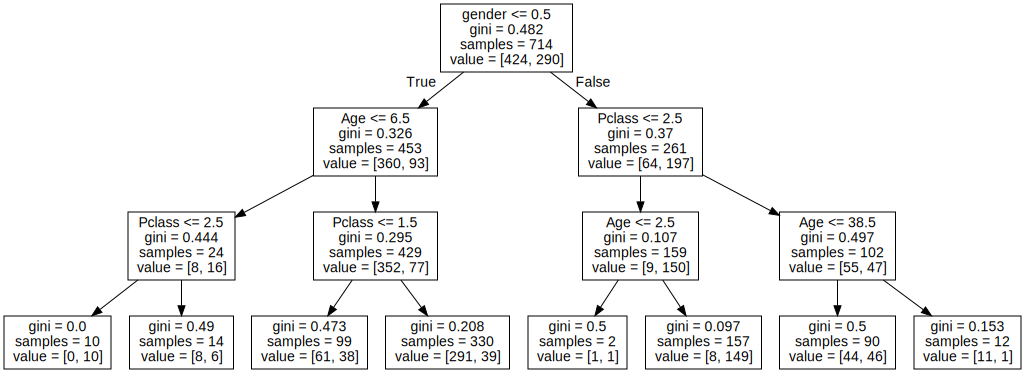

In [ ]:
graph

In [ ]:
graph.render("TitanicTree")

'TitanicTree.pdf'

## Ensemble Method:

In [ ]:
titanic_short

,Pclass,gender,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [ ]:
X = titanic_short
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 14, shuffle = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((571, 3), (143, 3), (571,), (143,))

## Splitting the Data:

In [121]:
rf =  ensemble.RandomForestClassifier(max_depth=7, criterion="gini", 
                        random_state = 42).fit(X_train, y_train)
print ("train score %.2f"%rf.score(X_train, y_train),
       "test score %.2f"%rf.score(X_test, y_test))
## I dont know if its worth the time to try to perfectly reciprocate these values

train score 0.88 test score 0.82


### Checking Hyperparameters:

In [160]:
max_depth_range = list(range(1,30))
scores = []
test_scores = []
auc_values = []

for i in max_depth_range:
  rf = ensemble.RandomForestClassifier(max_depth=i, criterion="gini", 
                        random_state = 42).fit(X_train, y_train)
  pred_y = rf.predict(X_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y)
  auc_values.append(metrics.auc(fpr, tpr))
  scores.append(rf.score(X_train, y_train))
  test_scores.append(rf.score(X_test,y_test))

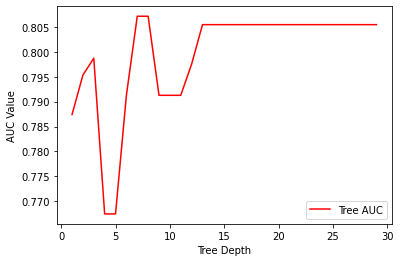

In [161]:
pl.plot(max_depth_range, auc_values, 'r-', label = 'Tree AUC');
#pl.plot(max_depth_range, test_scores, 'b-', label = 'Test Set')
pl.xlabel('Tree Depth')
pl.ylabel('AUC Value')
pl.legend();

### Figure 1: AUC Value Vs. Decision Tree Depth

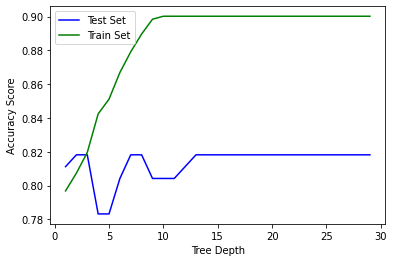

In [162]:
pl.plot(max_depth_range, test_scores, 'b-', label = 'Test Set');
pl.plot(max_depth_range, scores, 'g-', label = "Train Set");
pl.xlabel('Tree Depth')
pl.ylabel('Accuracy Score')
pl.legend();

### Figure 2: Accuracy Score Vs. Decision Tree Depth

In [163]:
rf =  ensemble.RandomForestClassifier(max_depth=7, criterion="gini", 
                        random_state = 42).fit(X_train, y_train)
print('score %.2f'%rf.score(X_train, y_train))

score 0.88


Well in terms of score I would immediately select a model with a depth of 7 nodes. Why? Well I decided to develop a quick visualization to show why. At a depth of 7 decision tree nodes we see a steady continuous increase of the training set accuracy score with a maxima also present on the accuracy score of the testing set. With this we can be glad to have good quantities for both of these accuracy values, BUT the important thing to consider is that we aren't plateauing our value of accuracy for the training set, this avoids overfitting the data to our training set. 


This can be further seein in our AUC trends, with a local maxima in AUC until a depth of 14 nodes (which seems way too large). 

### Gradient Boosted Trees:

In [164]:
BoostScores = []
test_BoostScores = []
auc_GradientBoost = []

for i in max_depth_range:
  gbt =  ensemble.GradientBoostingClassifier(max_depth = i, 
                                random_state = 342).fit(X_train, y_train)
  pred_y = gbt.predict(X_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y)
  auc_GradientBoost.append(metrics.auc(fpr, tpr))
  BoostScores.append(gbt.score(X_train, y_train))
  test_BoostScores.append(gbt.score(X_test,y_test))

In [165]:
print('score %.2f'%gbt.score(X_train, y_train))

score 0.90


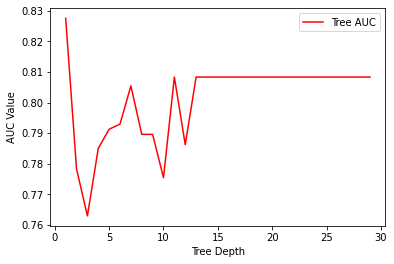

In [166]:
pl.plot(max_depth_range, auc_GradientBoost, 'r-', label = 'Tree AUC');
#pl.plot(max_depth_range, test_scores, 'b-', label = 'Test Set')
pl.xlabel('Tree Depth')
pl.ylabel('AUC Value')
pl.legend();

### Figure 3: AUC vs Tree Depth: GB

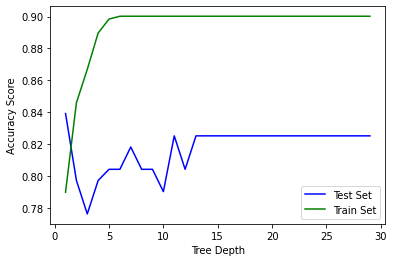

In [167]:
pl.plot(max_depth_range, test_BoostScores, 'b-', label = 'Test Set');
pl.plot(max_depth_range, BoostScores, 'g-', label = "Train Set");
pl.xlabel('Tree Depth')
pl.ylabel('Accuracy Score')
pl.legend();

### Figure 4: Accuracy vs Tree Depth

In [168]:
gbt =  ensemble.GradientBoostingClassifier(max_depth = 7, 
                                random_state = 342).fit(X_train, y_train)
print('score %.2f'%gbt.score(X_train, y_train))

score 0.90


Throughout this HW I was unsure of a general rule in regards to decision trees and I apoligize for not being present last class but is the depth of the decision tree dependent completely on the number of features in your dataset???

If not I have tune-selected 7 to be the number of nodes deep our gradient boosted model has, due to analysis on the visuals that I've developed.

## Feature Importance:

In [169]:
# calculate the error on the feature importance as the standard deviation of the feature importance for the trees in the forest
fistd = np.std([tree.feature_importances_ for tree in rf.estimators_], # in the [] build a "list comprehension statement" that results in a list of one feature importance vector for each tree in the forest
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (titanic_short.columns, rf.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

Random Forest feature importance
Pclass 0.21 +/- 0.05
gender 0.37 +/- 0.07
Age 0.42 +/- 0.08


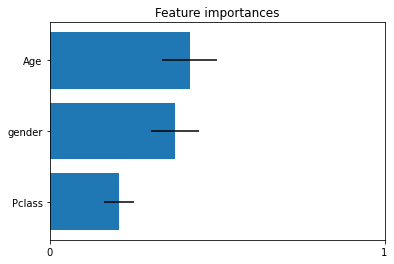

In [170]:
indices = np.argsort(rf.feature_importances_)
pl.figure()
pl.title("Feature importances")
pl.barh(np.arange(rf.feature_importances_.shape[0]), 
        rf.feature_importances_[indices],
       xerr=fistd[indices], align="center")
pl.xticks(range(rf.feature_importances_.shape[0]), indices)
pl.yticks(range(rf.feature_importances_.shape[0]), 
          labels=titanic_short.columns[indices])
pl.xlim(0, 1)
pl.show()